# Logistic Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# 0) setup data

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=1234)

#scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

569 30


In [ ]:
# 1) model

# f = wx + b, sigmoid

class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)
  
  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

model = LogisticRegression(n_features)

In [ ]:
# 2) loss and optimizer

learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch: 10, loss = 0.0974
epoch: 20, loss = 0.0969
epoch: 30, loss = 0.0965
epoch: 40, loss = 0.0960
epoch: 50, loss = 0.0956
epoch: 60, loss = 0.0952
epoch: 70, loss = 0.0947
epoch: 80, loss = 0.0943
epoch: 90, loss = 0.0939
epoch: 100, loss = 0.0935
accuracy = 0.9386


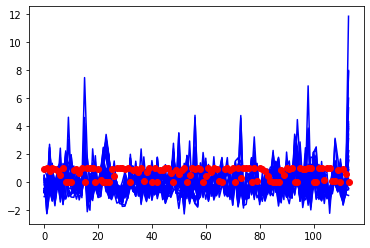

In [ ]:
# 3) training loop

n_epochs = 100
for epoch in range(n_epochs):
  #forward pass and loss
  y_pred = model(X_train)
  loss = criterion(y_pred, y_train)

  #backward pass
  loss.backward()

  #updates
  optimizer.step()

  #zero gradients 
  optimizer.zero_grad()

  if (epoch+1) % 10 ==0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')


#plot

import matplotlib.pyplot as plt

plt.plot(X_test, 'b')
plt.plot(y_predicted,'ro')